### Process
- import dependencies
- load data
- data preprocessing
    - feature selection
    - pearson correlation
    - 
- test-train split
- do classification
    - bagging
    - boosting
    - stacking
    - traditional ml techniques
- tables comparing accuracies, precesion, recall, f1
- different graphs

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [2]:
clinical_data = pd.read_csv('data/recent-data.csv', index_col=False)

In [3]:
clinical_data.columns

Index(['Case ID', 'Patient affiliation', 'Age at Histological Diagnosis',
       'Weight (lbs)', 'Gender', 'Ethnicity', 'Smoking status', 'Pack Years',
       'Quit Smoking Year', '%GG', 'Tumor Location (choice=RUL)',
       'Tumor Location (choice=RML)', 'Tumor Location (choice=RLL)',
       'Tumor Location (choice=LUL)', 'Tumor Location (choice=LLL)',
       'Tumor Location (choice=L Lingula)', 'Tumor Location (choice=Unknown)',
       'Histology ', 'Pathological T stage', 'Pathological N stage',
       'Pathological M stage', 'Histopathological Grade',
       'Lymphovascular invasion',
       'Pleural invasion (elastic, visceral, or parietal)',
       'EGFR mutation status', 'KRAS mutation status',
       'ALK translocation status', 'Adjuvant Treatment', 'Chemotherapy',
       'Radiation', 'Recurrence', 'Recurrence Location', 'Date of Recurrence',
       'Date of Last Known Alive', 'Survival Status', 'Date of Death',
       'Time to Death (days)', 'CT Date', 'Days between CT and sur

In [6]:
len(clinical_data.columns)

40

In [241]:
clinical_data['Case ID'].str.startswith('AMC').sum()

49

In [7]:
clinical_data.head(3)

,Case ID,Patient affiliation,Age at Histological Diagnosis,Weight (lbs),Gender,Ethnicity,Smoking status,Pack Years,Quit Smoking Year,%GG,...,Recurrence,Recurrence Location,Date of Recurrence,Date of Last Known Alive,Survival Status,Date of Death,Time to Death (days),CT Date,Days between CT and surgery,PET Date
0,AMC-001,Stanford,34,Not Collected,Male,Not Recorded In Database,Nonsmoker,NaN,NaN,Not Assessed,...,yes,distant,10/7/1994,1/7/1997,Dead,1/7/1997,872.0,8/10/1994,9,Not Collected
1,AMC-002,Stanford,33,Not Collected,Female,Not Recorded In Database,Nonsmoker,NaN,NaN,Not Assessed,...,no,NaN,NaN,3/20/1992,Alive,NaN,NaN,2/19/1992,3,Not Collected
2,AMC-003,Stanford,69,Not Collected,Female,Not Recorded In Database,Nonsmoker,NaN,NaN,Not Assessed,...,no,NaN,NaN,6/19/1996,Alive,NaN,NaN,2/23/1995,28,Not Collected


## Data Pre-processing

In [243]:
clinical_data.columns

Index(['Case ID', 'Patient affiliation', 'Age at Histological Diagnosis',
       'Weight (lbs)', 'Gender', 'Ethnicity', 'Smoking status', 'Pack Years',
       'Quit Smoking Year', '%GG', 'Tumor Location (choice=RUL)',
       'Tumor Location (choice=RML)', 'Tumor Location (choice=RLL)',
       'Tumor Location (choice=LUL)', 'Tumor Location (choice=LLL)',
       'Tumor Location (choice=L Lingula)', 'Tumor Location (choice=Unknown)',
       'Histology ', 'Pathological T stage', 'Pathological N stage',
       'Pathological M stage', 'Histopathological Grade',
       'Lymphovascular invasion',
       'Pleural invasion (elastic, visceral, or parietal)',
       'EGFR mutation status', 'KRAS mutation status',
       'ALK translocation status', 'Adjuvant Treatment', 'Chemotherapy',
       'Radiation', 'Recurrence', 'Recurrence Location', 'Date of Recurrence',
       'Date of Last Known Alive', 'Survival Status', 'Date of Death',
       'Time to Death (days)', 'CT Date', 'Days between CT and sur

In [244]:
#remove caseid and patient affiliation
clinical_data.drop(columns=['Case ID', 'Patient affiliation'], inplace=True)


In [245]:
clinical_data.iloc[48]['Recurrence']

'Not collected'

In [246]:
clinical_data.drop(index=[48], inplace=True)

In [247]:
clinical_data.iloc[48]['Recurrence']

'no'

In [248]:
clinical_data.columns

Index(['Age at Histological Diagnosis', 'Weight (lbs)', 'Gender', 'Ethnicity',
       'Smoking status', 'Pack Years', 'Quit Smoking Year', '%GG',
       'Tumor Location (choice=RUL)', 'Tumor Location (choice=RML)',
       'Tumor Location (choice=RLL)', 'Tumor Location (choice=LUL)',
       'Tumor Location (choice=LLL)', 'Tumor Location (choice=L Lingula)',
       'Tumor Location (choice=Unknown)', 'Histology ', 'Pathological T stage',
       'Pathological N stage', 'Pathological M stage',
       'Histopathological Grade', 'Lymphovascular invasion',
       'Pleural invasion (elastic, visceral, or parietal)',
       'EGFR mutation status', 'KRAS mutation status',
       'ALK translocation status', 'Adjuvant Treatment', 'Chemotherapy',
       'Radiation', 'Recurrence', 'Recurrence Location', 'Date of Recurrence',
       'Date of Last Known Alive', 'Survival Status', 'Date of Death',
       'Time to Death (days)', 'CT Date', 'Days between CT and surgery',
       'PET Date'],
      dtype='o

In [249]:
clinical_data['Weight (lbs)'].describe

<bound method NDFrame.describe of 0      Not Collected
1      Not Collected
2      Not Collected
3      Not Collected
4      Not Collected
           ...      
206              184
207            231.5
208    Not Collected
209              158
210              229
Name: Weight (lbs), Length: 210, dtype: object>

In [250]:
#repacing not collected with nan and calculating medeian to replace nan
clinical_data['Weight (lbs)'].replace('Not Collected', 'NaN', inplace=True)
clinical_data['Weight (lbs)'].replace('NaN', np.nan, inplace=True)

In [251]:
#replace Not Collected with NaN
clinical_data.replace('Not Collected', 'NaN', inplace=True)
clinical_data.replace('Not collected', 'NaN', inplace=True)
clinical_data.replace('Not Recorded In Database', 'NaN', inplace=True)
clinical_data.replace('NaN', np.nan, inplace=True)

In [252]:
clinical_data['Weight (lbs)'].describe()

count         152
unique        101
top       200.655
freq            7
Name: Weight (lbs), dtype: object

In [253]:
median_value = clinical_data['Weight (lbs)'].median()

In [254]:
clinical_data['Weight (lbs)'].replace(np.nan, median_value, inplace=True)

In [255]:
clinical_data['Weight (lbs)'].describe()

count     210.0
unique    102.0
top       171.0
freq       58.0
Name: Weight (lbs), dtype: float64

In [256]:
clinical_data.columns

Index(['Age at Histological Diagnosis', 'Weight (lbs)', 'Gender', 'Ethnicity',
       'Smoking status', 'Pack Years', 'Quit Smoking Year', '%GG',
       'Tumor Location (choice=RUL)', 'Tumor Location (choice=RML)',
       'Tumor Location (choice=RLL)', 'Tumor Location (choice=LUL)',
       'Tumor Location (choice=LLL)', 'Tumor Location (choice=L Lingula)',
       'Tumor Location (choice=Unknown)', 'Histology ', 'Pathological T stage',
       'Pathological N stage', 'Pathological M stage',
       'Histopathological Grade', 'Lymphovascular invasion',
       'Pleural invasion (elastic, visceral, or parietal)',
       'EGFR mutation status', 'KRAS mutation status',
       'ALK translocation status', 'Adjuvant Treatment', 'Chemotherapy',
       'Radiation', 'Recurrence', 'Recurrence Location', 'Date of Recurrence',
       'Date of Last Known Alive', 'Survival Status', 'Date of Death',
       'Time to Death (days)', 'CT Date', 'Days between CT and surgery',
       'PET Date'],
      dtype='o

In [257]:
gender = pd.Categorical(clinical_data['Gender'])
#remove old gender column
clinical_data.drop(columns=['Gender'])

#create new gender column
clinical_data['Gender'] = gender

In [258]:
clinical_data.Gender

0        Male
1      Female
2      Female
3      Female
4        Male
        ...  
206      Male
207      Male
208    Female
209      Male
210      Male
Name: Gender, Length: 210, dtype: category
Categories (2, object): ['Female', 'Male']

In [259]:
clinical_data.columns

Index(['Age at Histological Diagnosis', 'Weight (lbs)', 'Gender', 'Ethnicity',
       'Smoking status', 'Pack Years', 'Quit Smoking Year', '%GG',
       'Tumor Location (choice=RUL)', 'Tumor Location (choice=RML)',
       'Tumor Location (choice=RLL)', 'Tumor Location (choice=LUL)',
       'Tumor Location (choice=LLL)', 'Tumor Location (choice=L Lingula)',
       'Tumor Location (choice=Unknown)', 'Histology ', 'Pathological T stage',
       'Pathological N stage', 'Pathological M stage',
       'Histopathological Grade', 'Lymphovascular invasion',
       'Pleural invasion (elastic, visceral, or parietal)',
       'EGFR mutation status', 'KRAS mutation status',
       'ALK translocation status', 'Adjuvant Treatment', 'Chemotherapy',
       'Radiation', 'Recurrence', 'Recurrence Location', 'Date of Recurrence',
       'Date of Last Known Alive', 'Survival Status', 'Date of Death',
       'Time to Death (days)', 'CT Date', 'Days between CT and surgery',
       'PET Date'],
      dtype='o

In [260]:
smoking_status = pd.Categorical(clinical_data['Smoking status'])
#remove old smoking_status column
clinical_data.drop(columns=['Smoking status'])

#create new smoking_status column
clinical_data['Smoking status'] = smoking_status

In [261]:
gg = pd.Categorical(clinical_data['%GG'])
#remove old gg column
clinical_data.drop(columns=['%GG'])

#create new gg column
clinical_data['%GG'] = gg

In [262]:
from numpy import NaN


clinical_data['Tumor Location'] = NaN

## Functions

In [263]:
def To_Categorical(column_name):
    column = pd.Categorical(clinical_data[column_name])
    #remove old smoking_status column
    clinical_data.drop(columns=[column_name])

    #create new smoking_status column
    clinical_data[column_name] = column

In [264]:
# To_Categorical('Tumor Location (choice=RUL)')
# To_Categorical('Tumor Location (choice=RML)')
# To_Categorical('Tumor Location (choice=RLL)')
# To_Categorical('Tumor Location (choice=LUL)')
# To_Categorical('Tumor Location (choice=LLL)')
# To_Categorical('Tumor Location (choice=Unknown)')
# To_Categorical('Tumor Location (choice=L Lingula)')

In [265]:
clinical_data.replace({'Tumor Location (choice=L Lingula)': {'Checked':1, 'Unchecked':0}}, inplace=True)
clinical_data.replace({'Tumor Location (choice=RUL)': {'Checked':1, 'Unchecked':0}}, inplace=True)
clinical_data.replace({'Tumor Location (choice=RML)': {'Checked':1, 'Unchecked':0}}, inplace=True)
clinical_data.replace({'Tumor Location (choice=RLL)': {'Checked':1, 'Unchecked':0}}, inplace=True)
clinical_data.replace({'Tumor Location (choice=LUL)': {'Checked':1, 'Unchecked':0}}, inplace=True)
clinical_data.replace({'Tumor Location (choice=LLL)': {'Checked':1, 'Unchecked':0}}, inplace=True)
clinical_data.replace({'Tumor Location (choice=Unknown)': {'Checked':1, 'Unchecked':0}}, inplace=True)

In [266]:
clinical_data.drop(columns=['Tumor Location'], inplace=True)

In [267]:
clinical_data['Histology'] = clinical_data['Histology ']
clinical_data.drop(columns=['Histology '], inplace=True)

In [268]:
To_Categorical('Histology')

In [269]:
To_Categorical('Pathological T stage')
To_Categorical('Pathological M stage')
To_Categorical('Pathological N stage')

In [270]:
To_Categorical('Histopathological Grade')

In [271]:
To_Categorical('Lymphovascular invasion')

In [272]:
# clinical_data['Pleural invasion (elastic, visceral, or parietal)'].value_counts()
To_Categorical('Pleural invasion (elastic, visceral, or parietal)')

In [273]:
# clinical_data['EGFR mutation status'].value_counts()
To_Categorical('EGFR mutation status')

In [274]:
# clinical_data['KRAS mutation status'].value_counts()
To_Categorical('KRAS mutation status')

In [275]:
clinical_data['Adjuvant Treatment'].value_counts()
# To_Categorical('Adjuvant Treatment')
clinical_data.replace({'Adjuvant Treatment': {'Yes':1, 'No':0}}, inplace=True)

In [276]:
clinical_data['Chemotherapy'].value_counts()
clinical_data.replace({'Chemotherapy': {'Yes':1, 'No':0}}, inplace=True)

In [277]:
clinical_data['Radiation'].value_counts()
clinical_data.replace({'Radiation': {'Yes':1, 'No':0}}, inplace=True)

In [278]:
clinical_data['Recurrence'].value_counts()
clinical_data.replace({'Recurrence': {'yes':1, 'no':0}}, inplace=True)
# To_Categorical('Recurrence')

In [279]:

# clinical_data['Recurrence Location'].value_counts()
To_Categorical('Recurrence Location')

In [280]:
# remove columns 'Date of Recurrence','Date of Last Known Alive', 'Survival Status', 'Date of Death',

clinical_data.drop(columns=['Date of Recurrence','Date of Last Known Alive', 'Survival Status', 'Date of Death', 'Time to Death (days)', 'Recurrence Location'], inplace=True)
clinical_data.drop(columns=['PET Date', 'CT Date'], inplace=True)
clinical_data.drop(columns=['Quit Smoking Year'], inplace=True)

In [281]:

clinical_data['Histology'].value_counts()
# To_Categorical('Histology')

Adenocarcinoma                         171
Squamous cell carcinoma                 35
NSCLC NOS (not otherwise specified)      4
Name: Histology, dtype: int64

In [282]:
clinical_data.columns

Index(['Age at Histological Diagnosis', 'Weight (lbs)', 'Gender', 'Ethnicity',
       'Smoking status', 'Pack Years', '%GG', 'Tumor Location (choice=RUL)',
       'Tumor Location (choice=RML)', 'Tumor Location (choice=RLL)',
       'Tumor Location (choice=LUL)', 'Tumor Location (choice=LLL)',
       'Tumor Location (choice=L Lingula)', 'Tumor Location (choice=Unknown)',
       'Pathological T stage', 'Pathological N stage', 'Pathological M stage',
       'Histopathological Grade', 'Lymphovascular invasion',
       'Pleural invasion (elastic, visceral, or parietal)',
       'EGFR mutation status', 'KRAS mutation status',
       'ALK translocation status', 'Adjuvant Treatment', 'Chemotherapy',
       'Radiation', 'Recurrence', 'Days between CT and surgery', 'Histology'],
      dtype='object')

In [283]:
# # ethnicity 49 not recorded
# clinical_data.Ethnicity.vaalue_counts()['Not Recorded In Database']

# #pack years - total 163
# clinical_data['Pack Years'].count()

# #Quit Smoking years - total 108
# clinical_data['Quit Smoking Year'].count()



In [284]:
clinical_data

,Age at Histological Diagnosis,Weight (lbs),Gender,Ethnicity,Smoking status,Pack Years,%GG,Tumor Location (choice=RUL),Tumor Location (choice=RML),Tumor Location (choice=RLL),...,"Pleural invasion (elastic, visceral, or parietal)",EGFR mutation status,KRAS mutation status,ALK translocation status,Adjuvant Treatment,Chemotherapy,Radiation,Recurrence,Days between CT and surgery,Histology
0,34,171.0,Male,NaN,Nonsmoker,NaN,Not Assessed,0,0,1,...,NaN,Wildtype,Mutant,Wildtype,0,0,0,1,9,Adenocarcinoma
1,33,171.0,Female,NaN,Nonsmoker,NaN,Not Assessed,0,0,0,...,NaN,Wildtype,Wildtype,NaN,0,0,0,0,3,Adenocarcinoma
2,69,171.0,Female,NaN,Nonsmoker,NaN,Not Assessed,0,0,1,...,NaN,Mutant,Wildtype,Wildtype,0,0,0,0,28,Adenocarcinoma
3,80,171.0,Female,NaN,Nonsmoker,NaN,Not Assessed,0,0,0,...,NaN,Wildtype,Wildtype,Wildtype,0,0,0,0,47,Adenocarcinoma
4,76,171.0,Male,NaN,Former,30,Not Assessed,0,0,0,...,NaN,Mutant,Wildtype,Wildtype,0,0,0,1,2,Adenocarcinoma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,75,184,Male,Caucasian,Former,55,Not Assessed,0,0,0,...,No,Unknown,Unknown,Unknown,0,0,0,0,14,Squamous cell carcinoma
207,61,231.5,Male,Caucasian,Former,12,Not Assessed,1,0,0,...,No,Unknown,Mutant,Unknown,1,1,0,0,72,Adenocarcinoma
208,52,171.0,Female,Caucasian,Former,7,Not Assessed,0,0,0,...,No,Wildtype,Wildtype,Wildtype,0,0,0,0,8,Adenocarcinoma
209,67,158,Male,Asian,Former,15,Not Assessed,0,0,0,...,No,Mutant,Wildtype,Wildtype,0,0,0,0,65,Adenocarcinoma


In [285]:
# clinical_data['Weight (lbs)']

In [286]:
#weight to numerical value
clinical_data['Weight (lbs)'] = pd.to_numeric(clinical_data['Weight (lbs)'])
# clinical_data.astype({'Weight (lbs)':'Int32'})

In [287]:
# clinical_data['Quit Smoking'] = clinical_data['Quit Smoking Year'].isnull()
# clinical_data['Quit Smoking Year'] = clinical_data.drop('Quit Smoking Year', axis=1)

In [288]:
clinical_data['Weight (lbs)']

0      171.0
1      171.0
2      171.0
3      171.0
4      171.0
       ...  
206    184.0
207    231.5
208    171.0
209    158.0
210    229.0
Name: Weight (lbs), Length: 210, dtype: float64

In [289]:
clinical_data['Recurrence'].value_counts()

0    156
1     54
Name: Recurrence, dtype: int64

In [290]:
156+54

210

Train Test Split

In [291]:
print(156/210)
print(54/210)

0.7428571428571429
0.2571428571428571


In [292]:
0.8*210

168.0

In [293]:
0.25 * 168

42.0

In [294]:
clinical_data['Recurrence'].value_counts()

0    156
1     54
Name: Recurrence, dtype: int64

In [295]:
# 42 no data from recurrence
# 168-42 = 126 yes data from recurrence

In [296]:
# get only reccurrence yes values
clinical_data['Recurrence'][clinical_data['Recurrence'] == 1]

0      1
4      1
10     1
11     1
33     1
37     1
38     1
43     1
52     1
53     1
55     1
58     1
60     1
64     1
66     1
68     1
70     1
72     1
74     1
77     1
78     1
79     1
81     1
83     1
84     1
98     1
99     1
102    1
113    1
116    1
120    1
123    1
125    1
136    1
139    1
141    1
146    1
147    1
151    1
157    1
159    1
161    1
167    1
170    1
173    1
176    1
189    1
194    1
195    1
196    1
197    1
199    1
201    1
210    1
Name: Recurrence, dtype: int64

In [297]:
# get only reccurrence yes values
clinical_data['Recurrence'][clinical_data['Recurrence'] == 0]

1      0
2      0
3      0
5      0
6      0
      ..
205    0
206    0
207    0
208    0
209    0
Name: Recurrence, Length: 156, dtype: int64

In [298]:
X = clinical_data.copy()
X.drop(columns=['Recurrence'], inplace=True)
Y = clinical_data['Recurrence']

```
## Need to create a mechanism to train test by myself

```

In [299]:
from sklearn.preprocessing import OneHotEncoder

In [300]:
X['Gender']

0        Male
1      Female
2      Female
3      Female
4        Male
        ...  
206      Male
207      Male
208    Female
209      Male
210      Male
Name: Gender, Length: 210, dtype: category
Categories (2, object): ['Female', 'Male']

In [301]:
one_hot_encoded_data = pd.get_dummies(X)

In [302]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(one_hot_encoded_data, Y, test_size = 0.30, random_state = 0)

In [303]:
clinical_data['Tumor Location (choice=RUL)']

0      0
1      0
2      0
3      0
4      0
      ..
206    0
207    1
208    0
209    0
210    0
Name: Tumor Location (choice=RUL), Length: 210, dtype: int64

Feature Scaling

In [304]:
clinical_data.describe()

,Age at Histological Diagnosis,Weight (lbs),Tumor Location (choice=RUL),Tumor Location (choice=RML),Tumor Location (choice=RLL),Tumor Location (choice=LUL),Tumor Location (choice=LLL),Tumor Location (choice=L Lingula),Tumor Location (choice=Unknown),Adjuvant Treatment,Chemotherapy,Radiation,Recurrence,Days between CT and surgery
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.00000,210.0,210.000000,210.000000,210.000000,210.000000,210.000000
mean,67.928571,169.904878,0.366667,0.085714,0.142857,0.223810,0.157143,0.02381,0.0,0.233333,0.233333,0.076190,0.257143,50.352381
std,10.017671,35.618808,0.483046,0.280611,0.350763,0.417792,0.364805,0.15282,0.0,0.423963,0.423963,0.265937,0.438103,62.486053
min,24.000000,49.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000
25%,64.000000,152.145000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,20.250000
50%,68.000000,171.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,38.500000
75%,75.000000,184.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,1.000000,65.750000
max,87.000000,317.520000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.0,1.000000,1.000000,1.000000,1.000000,735.000000


In [305]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [306]:
np.array(y_train)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1])

In [307]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [308]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

from sklearn.svm import SVC
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

from sklearn.ensemble import GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)


GradientBoostingClassifier()

In [309]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score, precision_score
def predict(classifier):
    y_predict = classifier.predict(X_test)

    return y_predict

def print_evaluations(y_predict):
    cm = confusion_matrix(y_test, y_predict)
    ac = accuracy_score(y_test,y_predict)
    rs = recall_score(y_test,y_predict)
    ps = precision_score(y_test,y_predict)

    print(cm)
    print(ac)
    print(rs)
    print(ps)


In [310]:
nb_y_predict = predict(nb_classifier)
print('\nnb_y_predict')
print_evaluations(nb_y_predict)

svm_y_predict = predict(svm_classifier)
print('\nsvm_y_predict')
print_evaluations(svm_y_predict)

dt_y_predict = predict(dt_classifier)
print('\ndt_y_predict')
print_evaluations(dt_y_predict)

gb_y_predict = predict(gb_classifier)
print('\ngb_y_predict')
print_evaluations(gb_y_predict)


nb_y_predict
[[15 27]
 [ 7 14]]
0.4603174603174603
0.6666666666666666
0.34146341463414637

svm_y_predict
[[42  0]
 [21  0]]
0.6666666666666666
0.0
0.0

dt_y_predict
[[38  4]
 [15  6]]
0.6984126984126984
0.2857142857142857
0.6

gb_y_predict
[[40  2]
 [18  3]]
0.6825396825396826
0.14285714285714285
0.6


/Users/ms/miniforge3/envs/tensorflow-metal/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


k-fold validation

In [311]:
from sklearn.model_selection import cross_val_score

In [312]:
cross_val_score(GaussianNB(), one_hot_encoded_data, Y)

array([0.26190476, 0.33333333, 0.45238095, 0.35714286, 0.4047619 ])

In [313]:
cross_val_score(SVC(), one_hot_encoded_data, Y)

array([0.73809524, 0.73809524, 0.73809524, 0.73809524, 0.76190476])

In [314]:
cross_val_score(DecisionTreeClassifier(), one_hot_encoded_data, Y)

array([0.69047619, 0.78571429, 0.54761905, 0.5952381 , 0.64285714])

In [315]:
cross_val_score(GradientBoostingClassifier(), one_hot_encoded_data, Y)

array([0.73809524, 0.78571429, 0.64285714, 0.61904762, 0.78571429])

In [316]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_classifier = AdaBoostClassifier()
adaboost_classifier.fit(X_train, y_train)

from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)


RandomForestClassifier()

In [317]:
adaboost_y_predict = predict(adaboost_classifier)
print('\nadabost_y_predict')
print_evaluations(adaboost_y_predict)

rf_y_predict = predict(rf_classifier)
print('\nrf_y_predict')
print_evaluations(rf_y_predict)


adabost_y_predict
[[34  8]
 [16  5]]
0.6190476190476191
0.23809523809523808
0.38461538461538464

rf_y_predict
[[40  2]
 [19  2]]
0.6666666666666666
0.09523809523809523
0.5


In [318]:
from sklearn.ensemble import BaggingClassifier
bag_model = BaggingClassifier(
base_estimator=DecisionTreeClassifier(), 
    n_estimators=100, 
    max_samples=1.0, 
    bootstrap=True,
    oob_score=True,
    random_state=0
)
bag_model.fit(X_train, y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  oob_score=True, random_state=0)

In [319]:
bag_y_predict = predict(bag_model)
print('\nrf_y_predict')
print_evaluations(bag_y_predict)


rf_y_predict
[[39  3]
 [17  4]]
0.6825396825396826
0.19047619047619047
0.5714285714285714


In [320]:
cross_val_score(bag_model, one_hot_encoded_data, Y)

array([0.76190476, 0.78571429, 0.64285714, 0.69047619, 0.76190476])

**Feature Selection**
>dimentionality reduction

>RFE

In [321]:
from sklearn.feature_selection import RFE


rfe = RFE(RandomForestClassifier(n_estimators=100), n_features_to_select=30)

In [322]:
rfe.fit(one_hot_encoded_data, Y)

RFE(estimator=RandomForestClassifier(), n_features_to_select=30)

In [323]:
# correlated_features = set()
# correlation_matrix = clinical_data.drop('Recurrence', axis=1).corr()

# for i in range(len(correlation_matrix.columns)):
#     for j in range(i):
#         if abs(correlation_matrix.iloc[i, j]) > 0.8:
#             colname = correlation_matrix.columns[i]
#             correlated_features.add(colname)

In [324]:
one_hot_encoded_data

,Age at Histological Diagnosis,Weight (lbs),Tumor Location (choice=RUL),Tumor Location (choice=RML),Tumor Location (choice=RLL),Tumor Location (choice=LUL),Tumor Location (choice=LLL),Tumor Location (choice=L Lingula),Tumor Location (choice=Unknown),Adjuvant Treatment,...,EGFR mutation status_Wildtype,KRAS mutation status_Mutant,KRAS mutation status_Unknown,KRAS mutation status_Wildtype,ALK translocation status_Translocated,ALK translocation status_Unknown,ALK translocation status_Wildtype,Histology_Adenocarcinoma,Histology_NSCLC NOS (not otherwise specified),Histology_Squamous cell carcinoma
0,34,171.0,0,0,1,0,0,0,0,0,...,1,1,0,0,0,0,1,1,0,0
1,33,171.0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0
2,69,171.0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
3,80,171.0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,1,1,0,0
4,76,171.0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,75,184.0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
207,61,231.5,1,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,1,0,0
208,52,171.0,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,1,1,0,0
209,67,158.0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0


In [325]:
# correlated_features

In [326]:
one_hot_encoded_data

,Age at Histological Diagnosis,Weight (lbs),Tumor Location (choice=RUL),Tumor Location (choice=RML),Tumor Location (choice=RLL),Tumor Location (choice=LUL),Tumor Location (choice=LLL),Tumor Location (choice=L Lingula),Tumor Location (choice=Unknown),Adjuvant Treatment,...,EGFR mutation status_Wildtype,KRAS mutation status_Mutant,KRAS mutation status_Unknown,KRAS mutation status_Wildtype,ALK translocation status_Translocated,ALK translocation status_Unknown,ALK translocation status_Wildtype,Histology_Adenocarcinoma,Histology_NSCLC NOS (not otherwise specified),Histology_Squamous cell carcinoma
0,34,171.0,0,0,1,0,0,0,0,0,...,1,1,0,0,0,0,1,1,0,0
1,33,171.0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0
2,69,171.0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
3,80,171.0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,1,1,0,0
4,76,171.0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,75,184.0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
207,61,231.5,1,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,1,0,0
208,52,171.0,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,1,1,0,0
209,67,158.0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0


In [327]:
rfe.estimator_.feature_importances_

array([0.1168015 , 0.10439369, 0.03055387, 0.02219439, 0.02102274,
       0.02224686, 0.02966784, 0.02676755, 0.04144323, 0.12331158,
       0.02016791, 0.02104788, 0.02133719, 0.03884497, 0.02051259,
       0.02272795, 0.0234173 , 0.0223145 , 0.01959849, 0.01669991,
       0.02782368, 0.03419579, 0.02178538, 0.02896257, 0.02116504,
       0.02181521, 0.02056006, 0.02070986, 0.02009374, 0.01781674])

In [328]:
rfe.get_support()

array([ True,  True,  True, False,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True, False, False,  True,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False,  True, False, False, False,  True, False,
        True, False, False,  True, False,  True, False, False,  True,
       False,  True,  True, False, False, False, False,  True, False,
        True, False,  True, False, False,  True, False, False, False,
        True, False, False])

In [329]:
selected_feat= one_hot_encoded_data.columns[(rfe.get_support())]
len(selected_feat)

30

In [330]:
selected_feat

Index(['Age at Histological Diagnosis', 'Weight (lbs)',
       'Tumor Location (choice=RUL)', 'Tumor Location (choice=RLL)',
       'Tumor Location (choice=LUL)', 'Tumor Location (choice=LLL)',
       'Adjuvant Treatment', 'Chemotherapy', 'Radiation',
       'Days between CT and surgery', 'Gender_Female', 'Gender_Male',
       'Ethnicity_Caucasian', 'Smoking status_Former',
       'Smoking status_Nonsmoker', 'Pack Years_50', '%GG_0%', '%GG_>0 - 25%',
       'Pathological T stage_T2a', 'Pathological T stage_T3',
       'Pathological N stage_N0', 'Pathological N stage_N2',
       'Pathological M stage_M1b',
       'Histopathological Grade_G2 Moderately differentiated',
       'Histopathological Grade_G3 Poorly differentiated',
       'Pleural invasion (elastic, visceral, or parietal)_No',
       'EGFR mutation status_Mutant', 'EGFR mutation status_Wildtype',
       'KRAS mutation status_Wildtype', 'Histology_Adenocarcinoma'],
      dtype='object')

In [331]:
for i in range(X_train.shape[1]):
	print('Column: %d, Selected: %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected: True, Rank: 1.000
Column: 1, Selected: True, Rank: 1.000
Column: 2, Selected: True, Rank: 1.000
Column: 3, Selected: False, Rank: 17.000
Column: 4, Selected: True, Rank: 1.000
Column: 5, Selected: True, Rank: 1.000
Column: 6, Selected: True, Rank: 1.000
Column: 7, Selected: False, Rank: 29.000
Column: 8, Selected: False, Rank: 79.000
Column: 9, Selected: True, Rank: 1.000
Column: 10, Selected: True, Rank: 1.000
Column: 11, Selected: True, Rank: 1.000
Column: 12, Selected: True, Rank: 1.000
Column: 13, Selected: True, Rank: 1.000
Column: 14, Selected: True, Rank: 1.000
Column: 15, Selected: False, Rank: 14.000
Column: 16, Selected: False, Rank: 20.000
Column: 17, Selected: True, Rank: 1.000
Column: 18, Selected: False, Rank: 22.000
Column: 19, Selected: False, Rank: 45.000
Column: 20, Selected: False, Rank: 2.000
Column: 21, Selected: True, Rank: 1.000
Column: 22, Selected: True, Rank: 1.000
Column: 23, Selected: False, Rank: 62.000
Column: 24, Selected: False, Rank

In [332]:
selected = one_hot_encoded_data == rfe.get_support()

In [333]:
len(selected.columns)

111

In [334]:
len(one_hot_encoded_data.columns)

111

In [335]:
selected_data = one_hot_encoded_data[selected_feat]

```
Codes after Feature Selection
```

In [336]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(selected_data, Y, test_size = 0.30, random_state = 0)

In [337]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [338]:
from sklearn.naive_bayes import GaussianNB
nb_classifier_afs = GaussianNB()
nb_classifier_afs.fit(X_train, y_train)

from sklearn.svm import SVC
svm_classifier_afs = SVC()
svm_classifier_afs.fit(X_train, y_train)

from sklearn.tree import DecisionTreeClassifier
dt_classifier_afs = DecisionTreeClassifier()
dt_classifier_afs.fit(X_train, y_train)

from sklearn.ensemble import GradientBoostingClassifier
gb_classifier_afs = GradientBoostingClassifier()
gb_classifier_afs.fit(X_train, y_train)

GradientBoostingClassifier()

In [341]:
nb_y_predict_afs = nb_classifier_afs.predict(X_test)
print('\nnb_y_predict_afs')
print_evaluations(nb_y_predict_afs)

svm_y_predict_afs = svm_classifier_afs.predict(X_test)
print('\nsvm_y_predict_afs')
print_evaluations(svm_y_predict_afs)

dt_y_predict_afs = dt_classifier_afs.predict(X_test)
print('\ndt_y_predict_afs')
print_evaluations(dt_y_predict_afs)

gb_y_predict_afs = gb_classifier_afs.predict(X_test)
print('\ngb_y_predict_afs')
print_evaluations(gb_y_predict_afs)


nb_y_predict_afs
[[42  0]
 [17  4]]
0.7301587301587301
0.19047619047619047
1.0

svm_y_predict_afs
[[42  0]
 [20  1]]
0.6825396825396826
0.047619047619047616
1.0

dt_y_predict_afs
[[32 10]
 [15  6]]
0.6031746031746031
0.2857142857142857
0.375

gb_y_predict_afs
[[39  3]
 [17  4]]
0.6825396825396826
0.19047619047619047
0.5714285714285714


In [342]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_classifier_afs = AdaBoostClassifier()
adaboost_classifier_afs.fit(X_train, y_train)

from sklearn.ensemble import RandomForestClassifier
rf_classifier_afs = RandomForestClassifier()
rf_classifier_afs.fit(X_train, y_train)


RandomForestClassifier()

In [343]:
adaboost_y_predict_afs = adaboost_classifier_afs.predict(X_test)
print('\nadaboost_y_predict_afs')
print_evaluations(adaboost_y_predict_afs)

rf_y_predict_afs = rf_classifier_afs.predict(X_test)
print('\nrf_y_predict_afs')
print_evaluations(rf_y_predict_afs)


adaboost_y_predict_afs
[[35  7]
 [15  6]]
0.6507936507936508
0.2857142857142857
0.46153846153846156

rf_y_predict_afs
[[41  1]
 [18  3]]
0.6984126984126984
0.14285714285714285
0.75


In [348]:
from sklearn.ensemble import BaggingClassifier
bag_model_afs = BaggingClassifier(
base_estimator=DecisionTreeClassifier(), 
    n_estimators=100, 
    max_samples=1.0, 
    bootstrap=True,
    oob_score=True,
    random_state=0
)


In [349]:
bag_model_afs.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  oob_score=True, random_state=0)

In [351]:
bag_y_predict_afs = bag_model_afs.predict(X_test)
print('\nbag_y_predict_afs')
print_evaluations(bag_y_predict_afs)


bag_y_predict_afs
[[41  1]
 [17  4]]
0.7142857142857143
0.19047619047619047
0.8


In [383]:
from sklearn.model_selection import StratifiedKFold


scoring = {'acc': 'accuracy',
           'prec': 'precision_macro',
           'rec': 'recall_macro',
           'f1': 'f1_macro',
           'mse': 'neg_mean_squared_error',
           'rmse': 'neg_root_mean_squared_error'}
n_splits = 15 #total number of splits in cross validation
cv = StratifiedKFold(n_splits=n_splits, random_state=50, shuffle=True) #cross validation

def get_mean(cv_result):       
    ac = cv_result['test_acc'].mean()
    ps = cv_result['test_prec'].mean()
    rs = cv_result['test_rec'].mean()
    f1 = cv_result['test_f1'].mean()
    rmse = cv_result['test_rmse'].mean()

    result = {
        'ac': ac,
        'ps': rs,
        'rs': ps,
        'f1': f1,
        'rmse': rmse
    }

    print(f"ac: {ac}")
    print(f"ps: {rs}")
    print(f"rs: {ps}")
    print(f"f1: {f1}")
    print(f"rmse: {rmse}")

    return result

def get_graph(cv_result, metric):
    X_a = np.arange(1,16)
    X_axis = np.arange(len(X_a))

    if type(cv_result) == list:
        distance_for_bars = -0.2
        for i in range(len(cv_result)):
            if i/2 == 1: 
                distance_for_bars = -(distance_for_bars)
            plt.bar(X_a + distance_for_bars,height=-cv_result[i][f'test_{metric}'], width=0.4)
    else:
        plt.bar(X_a, -cv_result[f'test_{metric}'])

    plt.ylim(0,1,0.1)
    plt.xticks(X_axis, X_a)

    plt.title("Graph")
    plt.xlabel("Cross Validation Group")
    plt.ylabel("Percentage")
    plt.legend('G')
    plt.show()

    return

In [ ]:
# import numpy as np 
# import matplotlib.pyplot as plt 
  
# X = ['Group A','Group B','Group C','Group D']
# Ygirls = [10,20,20,40]
# Zboys = [20,30,25,30]
  
# X_axis = np.arange(len(X))
  
# plt.bar(X_axis - 0.2, Ygirls, 0.4, label = 'Girls')
# plt.bar(X_axis + 0.2, Zboys, 0.4, label = 'Boys')
  
# plt.xticks(X_axis, X)
# plt.xlabel("Groups")
# plt.ylabel("Number of Students")
# plt.title("Number of Students in each group")
# plt.legend()
# plt.show()

In [ ]:
type(['asdf', 'asdf']) == list

True

In [354]:
from sklearn.model_selection import cross_validate


rf_cv_result = cross_validate(RandomForestClassifier(),one_hot_encoded_data, Y, cv=cv, scoring=scoring, n_jobs=1)

/Users/ms/miniforge3/envs/tensorflow-metal/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ms/miniforge3/envs/tensorflow-metal/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ms/miniforge3/envs/tensorflow-metal/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ms/

In [355]:
get_mean(rf_cv_result)

ac: 0.7523809523809526
ps: 0.5531313131313131
rs: 0.5994810744810746
f1: 0.5301914800175671
rmse: -0.49478960699134183


In [356]:
rf_cv_result

{'fit_time': array([0.08239579, 0.07733822, 0.07887697, 0.0779283 , 0.07837081,
        0.07738686, 0.07816172, 0.07712197, 0.07801223, 0.07734084,
        0.0790391 , 0.07797408, 0.0780108 , 0.07783818, 0.07862115]),
 'score_time': array([0.00775909, 0.007936  , 0.00750995, 0.007442  , 0.00744319,
        0.00735188, 0.0072031 , 0.00779891, 0.00743198, 0.0076611 ,
        0.00752997, 0.00745988, 0.00732732, 0.00744581, 0.00741076]),
 'test_acc': array([0.78571429, 0.71428571, 0.71428571, 0.78571429, 0.57142857,
        0.78571429, 0.78571429, 0.71428571, 0.78571429, 0.78571429,
        0.78571429, 0.71428571, 0.78571429, 0.78571429, 0.78571429]),
 'test_prec': array([0.88461538, 0.35714286, 0.625     , 0.88461538, 0.33333333,
        0.88461538, 0.88461538, 0.35714286, 0.88461538, 0.39285714,
        0.66666667, 0.38461538, 0.39285714, 0.39285714, 0.66666667]),
 'test_rec': array([0.625     , 0.5       , 0.575     , 0.625     , 0.4       ,
        0.625     , 0.625     , 0.5       , 0

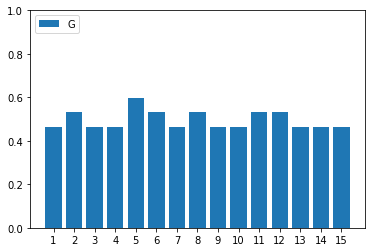

In [ ]:
get_graph(rf_cv_result, "rmse")

In [358]:
from sklearn.linear_model import SGDClassifier

bag_cv_results = cross_validate(bag_model,one_hot_encoded_data, Y, cv=cv, scoring=scoring, n_jobs=1)
rf_cv_results = cross_validate(rf_classifier,one_hot_encoded_data, Y, cv=cv, scoring=scoring, n_jobs=1)
gd_cv_results = cross_validate(gb_classifier,one_hot_encoded_data, Y, cv=cv, scoring=scoring, n_jobs=1)
sgd_cv_results = cross_validate(SGDClassifier(),one_hot_encoded_data, Y, cv=cv, scoring=scoring, n_jobs=1)

/Users/ms/miniforge3/envs/tensorflow-metal/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ms/miniforge3/envs/tensorflow-metal/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ms/miniforge3/envs/tensorflow-metal/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ms/

In [362]:
get_mean(bag_cv_results)
get_mean(gd_cv_results)
get_mean(sgd_cv_results)
get_mean(sgd_cv_results)

ac: 0.7428571428571428
ps: 0.582929292929293
rs: 0.5993534243534243
f1: 0.570144551101073
rmse: -0.5019921382516065
ac: 0.7095238095238094
ps: 0.5502020202020201
rs: 0.5590564990564991
f1: 0.5350793375621752
rmse: -0.5338867803086755
ac: 0.5952380952380951
ps: 0.5013131313131313
rs: 0.3797258297258298
f1: 0.3854322714322715
rmse: -0.615937088256913
ac: 0.5952380952380951
ps: 0.5013131313131313
rs: 0.3797258297258298
f1: 0.3854322714322715
rmse: -0.615937088256913


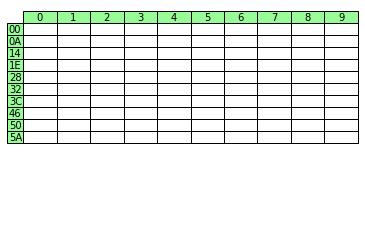

In [373]:
val1 = ["{:X}".format(i) for i in range(10)] 
val2 = ["{:02X}".format(10 * i) for i in range(10)] 
val3 = [["" for c in range(10)] for r in range(10)] 
   
fig, ax = plt.subplots() 
ax.set_axis_off() 
table = ax.table( 
    cellText = val3,  
    rowLabels = val2,  
    colLabels = val1, 
    rowColours =["palegreen"] * 10,  
    colColours =["palegreen"] * 10, 
    cellLoc ='center',  
    loc ='upper left') 
   
plt.show() 

In [412]:
bag_cv_means = get_mean(bag_cv_results)
rf_cv_means = get_mean(rf_cv_results )
gd_cv_means = get_mean(gd_cv_results )
sgd_cv_means = get_mean(sgd_cv_results)

ac: 0.7428571428571428
ps: 0.582929292929293
rs: 0.5993534243534243
f1: 0.570144551101073
rmse: -0.5019921382516065
ac: 0.7619047619047622
ps: 0.5725757575757575
rs: 0.647960372960373
f1: 0.5587585795846667
rmse: -0.48532394413015323
ac: 0.7095238095238094
ps: 0.5502020202020201
rs: 0.5590564990564991
f1: 0.5350793375621752
rmse: -0.5338867803086755
ac: 0.5952380952380951
ps: 0.5013131313131313
rs: 0.3797258297258298
f1: 0.3854322714322715
rmse: -0.615937088256913


In [415]:
gd_cv_means

{'ac': 0.7095238095238094,
 'ps': 0.5502020202020201,
 'rs': 0.5590564990564991,
 'f1': 0.5350793375621752,
 'rmse': -0.5338867803086755}

In [420]:
df = pd.DataFrame(
    # columns=['Bagging', 'Boosting', 'Stacking', 'NB', 'SGD', 'DT'],
    columns=['ac', 'ps', 'rs', 'f1', 'rmse'],
    data=[bag_cv_means, rf_cv_means, gd_cv_means, sgd_cv_means],
    index=['Bagging', 'RF', 'GD', 'SGD']
)

In [421]:
df

,ac,ps,rs,f1,rmse
Bagging,0.742857,0.582929,0.599353,0.570145,-0.501992
RF,0.761905,0.572576,0.647960,0.558759,-0.485324
GD,0.709524,0.550202,0.559056,0.535079,-0.533887
SGD,0.595238,0.501313,0.379726,0.385432,-0.615937


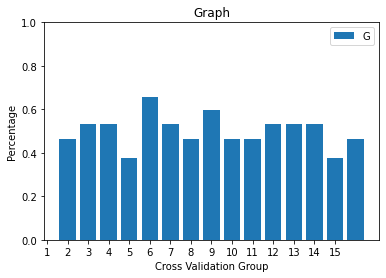

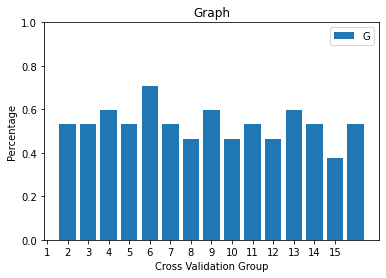

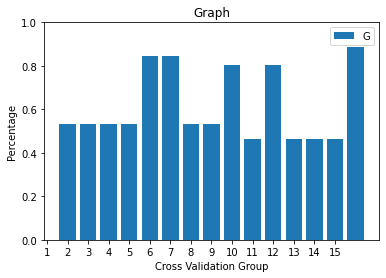

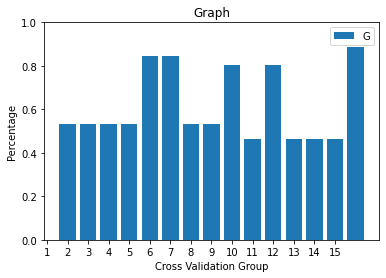

In [ ]:
metric = 'rmse'
get_graph(bag_cv_results, metric)
get_graph(gd_cv_results, metric)
get_graph(sgd_cv_results, metric)
get_graph(sgd_cv_results, metric)

In [ ]:
from sklearn.linear_model import SGDClassifier

# afs = after feature selection
rf_afs_cv_results = cross_validate(RandomForestClassifier(),selected_data, Y, cv=cv, scoring=scoring, n_jobs=1)
gd_afs_cv_results = cross_validate(GradientBoostingClassifier(),selected_data, Y, cv=cv, scoring=scoring, n_jobs=1)
sgd_afs_cv_results = cross_validate(SGDClassifier(),selected_data, Y, cv=cv, scoring=scoring, n_jobs=1)

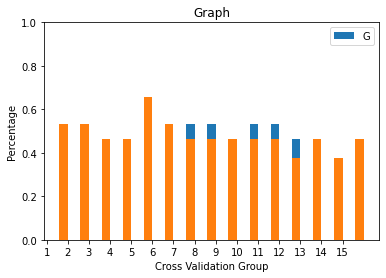

In [ ]:
get_graph([rf_afs_cv_results,rf_cv_results] , "rmse")

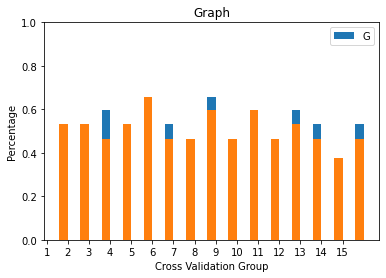

In [ ]:
get_graph([gd_cv_results,gd_afs_cv_results] , "rmse")

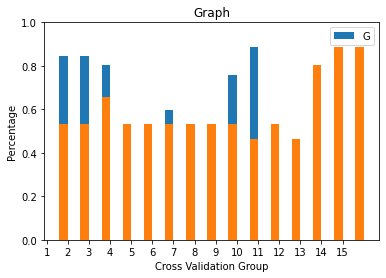

In [ ]:
get_graph([sgd_cv_results,sgd_afs_cv_results] , "rmse")

In [ ]:
get_mean(rf_afs_cv_results)
get_mean(rf_cv_results)

ac: 0.7619047619047621
ps: 0.5828787878787878
rs: 0.6015290265290266
f1: 0.5659955455172848
rmse: -0.4835461917383565
ac: 0.7666666666666668
ps: 0.5783838383838383
rs: 0.6433899433899434
f1: 0.5622189597841772
rmse: -0.4786893678118305
